In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/COVID-19 Cases.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/coronavirusdataset/TimeProvince.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/coronavirusdataset/PatientInfo.csv
/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/coronavirusdataset/Time.csv
/kaggl

In [23]:
df = pd.read_csv('/kaggle/input/covidcompletesetcc/COVID-19-DATASETS/corona-virus-report/covid_19_clean_complete.csv',parse_dates=['Date'])

In [24]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0


In [25]:
df['Active'] = df['Confirmed']-df['Deaths']-df['Recovered']

In [26]:
top = df[df['Date']==df['Date'].max()]
world = top.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()
world.head()

,Country/Region,Confirmed,Active,Deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [27]:
figure =px.choropleth(world,locations='Country/Region',
                     locationmode='country names',color = 'Active',
                     hover_name='Country/Region',range_color=[1,1000],
                     color_continuous_scale='Peach',
                     title = "Countries with Active cases")
figure.show()

- Countries with **low peach color** has very less cases
- Countries with **dark peach color** has **high number of active cases.**

[Text(0, 0.5, 'Cases'), Text(0.5, 0, 'Dates')]

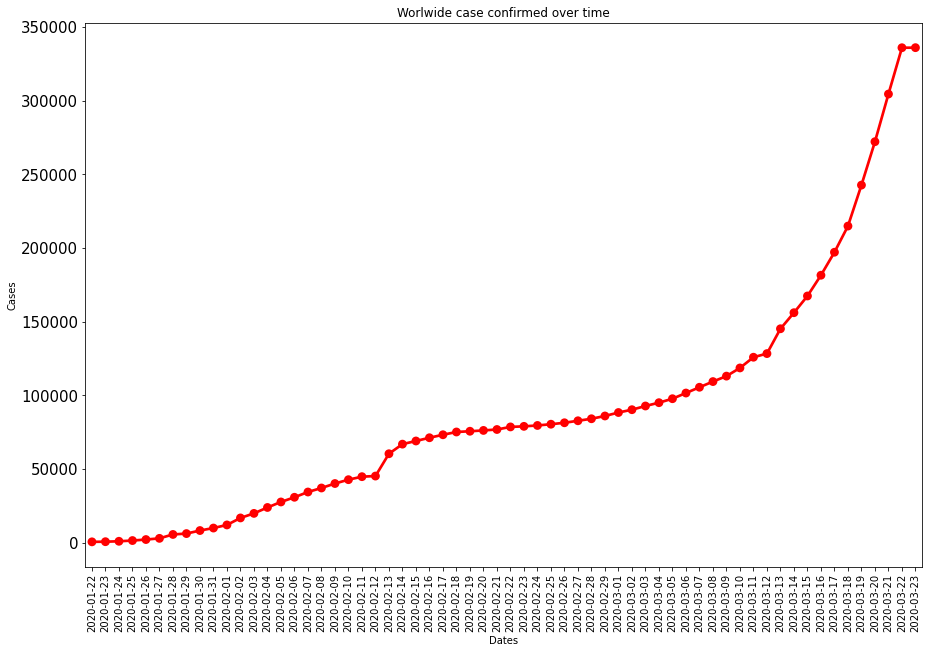

In [28]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90, fontsize =10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize = 10)
plt.ylabel('Total Cases',fontsize = 10)
plt.title('Worlwide case confirmed over time')
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date']= pd.to_datetime(total_cases['Date'])

ax = sns.pointplot(x=total_cases['Date'].dt.date,y= total_cases['Confirmed'],color = 'r')
ax.set(xlabel='Dates',ylabel = 'Cases')

- The number of cases has gradually increased, it has raised almost exponentially.
- This was the reason **Lockdown was called upon** to stop the sudden increase in the graph

### Let us look at the top active cases

In [29]:
top_activities = top.groupby(by='Country/Region')['Active'].sum().sort_values(ascending =False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

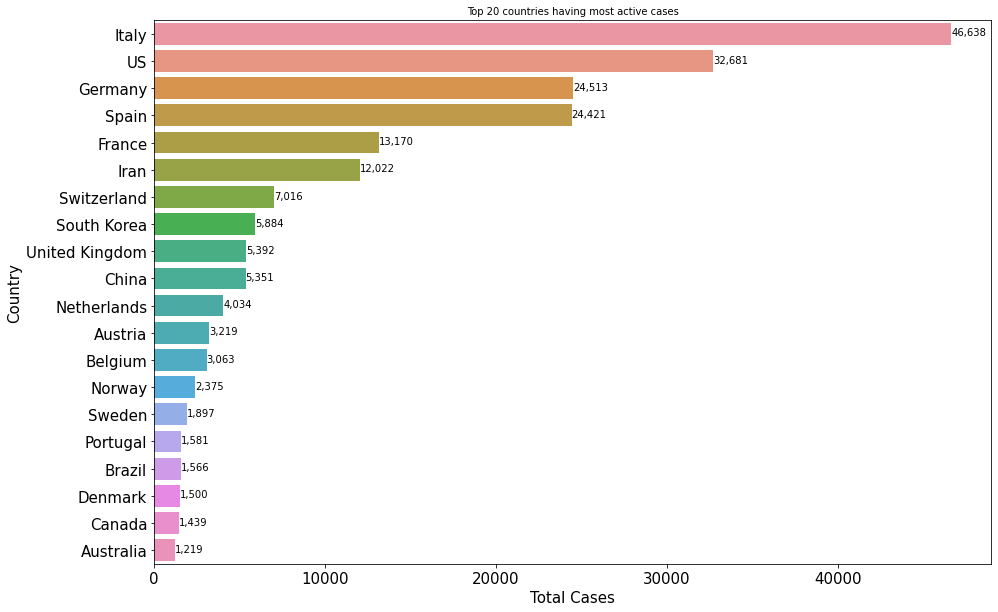

In [30]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most active cases' ,fontsize=10)

ax = sns.barplot(x=top_activities['Active'], y = top_activities['Country/Region'])
for i ,(value,name) in enumerate (zip(top_activities['Active'],top_activities['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

- Italy has the **most number of Active Cases.**
- The graph displays all the **countries in Descending order based on the Active cases**.

In [31]:
top_deaths = top.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending =False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

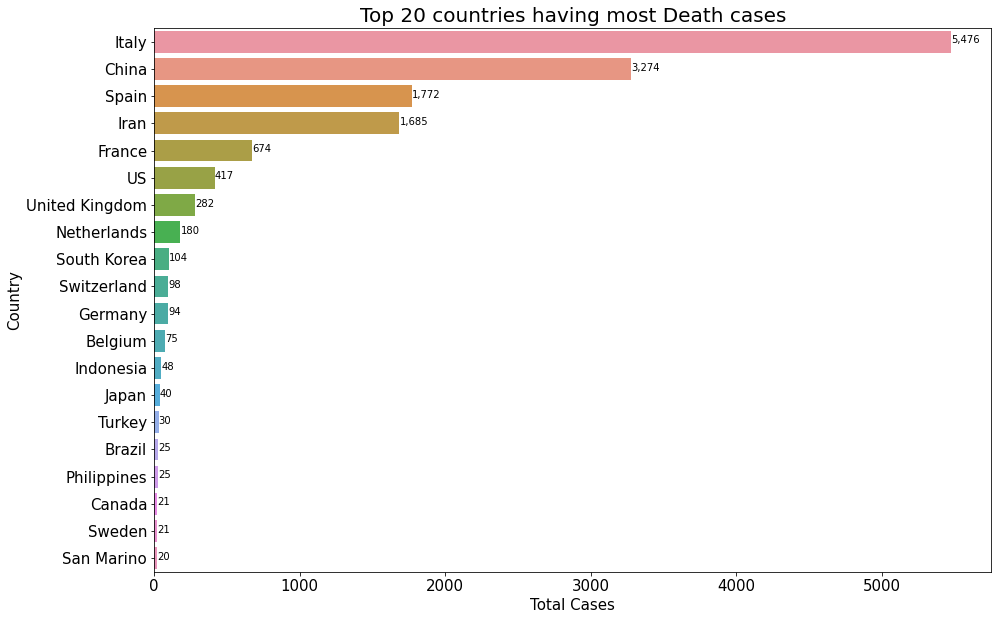

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most Death cases' ,fontsize=20)

ax = sns.barplot(x=top_deaths['Deaths'], y = top_deaths['Country/Region'])
for i ,(value,name) in enumerate (zip(top_deaths['Deaths'],top_deaths['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

- Italy is the country with most number of deaths
- The graph displays in descending order the number of deaths in each country with the values.


In [33]:
top_recovered = top.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending =False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Recovered Cases')]

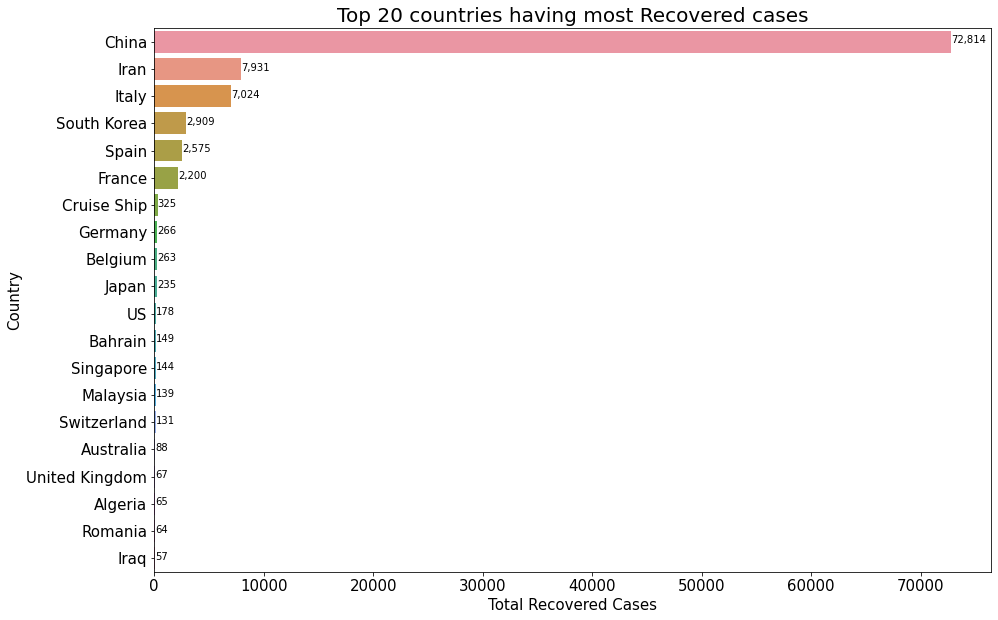

In [34]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Recovered Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most Recovered cases' ,fontsize=20)

ax = sns.barplot(x=top_recovered['Recovered'], y = top_recovered['Country/Region'])
for i ,(value,name) in enumerate (zip(top_recovered['Recovered'],top_recovered['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Recovered Cases',ylabel='Country')

- **China** has the **most recovered cases**, as it was already known in China about the COVID-19 virus and they had imposed the lock down much prior to other countries.

In [35]:
china = df[df['Country/Region']== 'China']
china =china.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()

In [36]:
US = df[df['Country/Region']== 'US']
US =US.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
US = US.iloc[33:].reset_index().drop('index',axis =1)

In [37]:
Italy = df[df['Country/Region']== 'Italy']
Italy = Italy.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
Italy = Italy.iloc[9:].reset_index().drop('index',axis =1)

In [38]:
India = df[df['Country/Region']== 'India']
India = India.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
India = India.iloc[9:].reset_index().drop('index',axis =1)

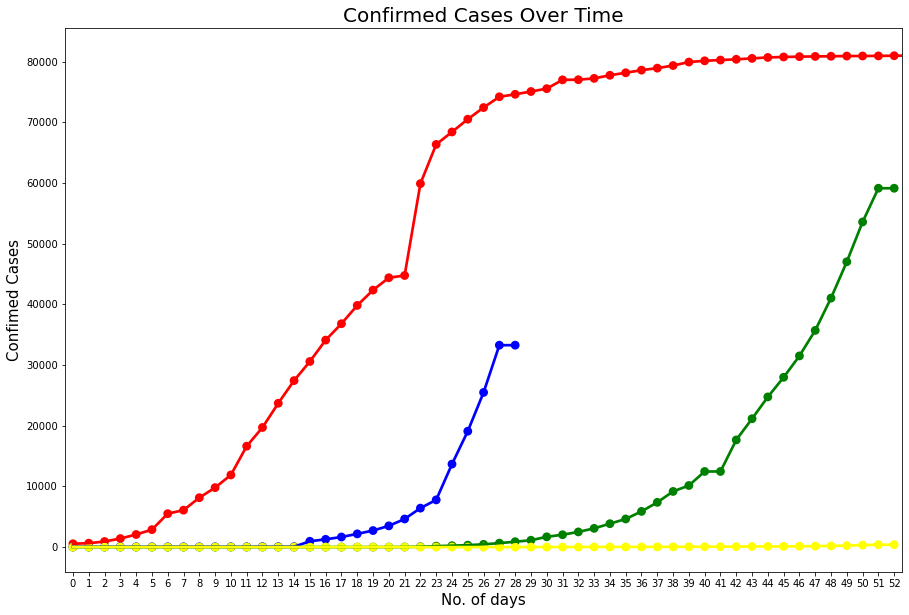

In [39]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Confirmed,color = 'Red')
sns.pointplot(US.index,US.Confirmed,color = 'Blue')
sns.pointplot(Italy.index,Italy.Confirmed,color = 'Green')
sns.pointplot(India.index,India.Confirmed,color = 'Yellow')

plt.title('Confirmed Cases Over Time',fontsize = 20)
plt.ylabel('Confimed Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()


- Compared to other countries
 - **China has the most Confirmed cases**
 - **India** has the **least number of confirmed cases**
 - The cases has **increased over the period **of time by a large number in **Italy**

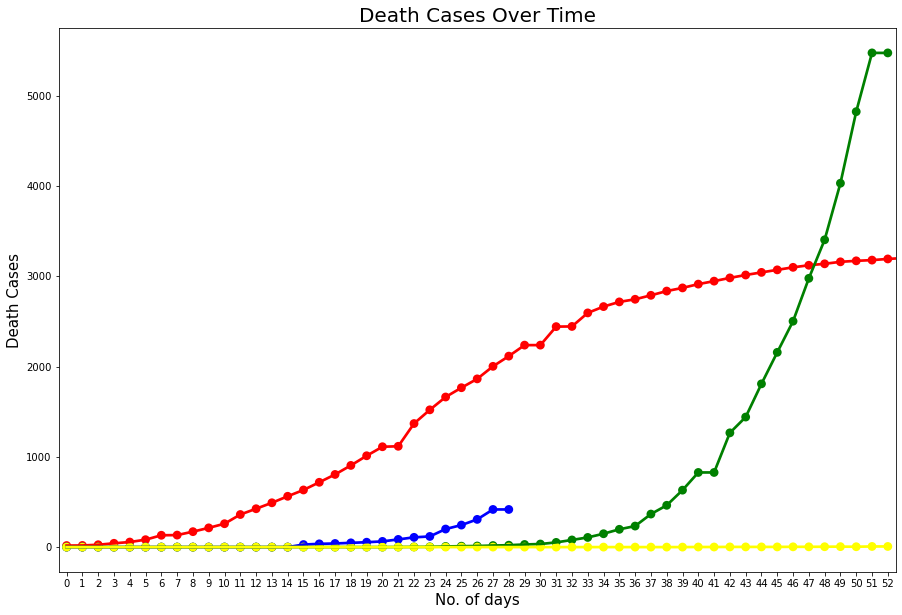

In [40]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Deaths,color = 'Red')
sns.pointplot(US.index,US.Deaths,color = 'Blue')
sns.pointplot(Italy.index,Italy.Deaths,color = 'Green')
sns.pointplot(India.index,India.Deaths,color = 'Yellow')

plt.title('Death Cases Over Time',fontsize = 20)
plt.ylabel('Death Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()


- There is a huge spike in the number of Death cases in Italy.
- For china, we can see that the graph didnt rise up alot due to the Early Lockdown that was imposed in the country
- The number of Deaths in India has been very minimal compared to others.

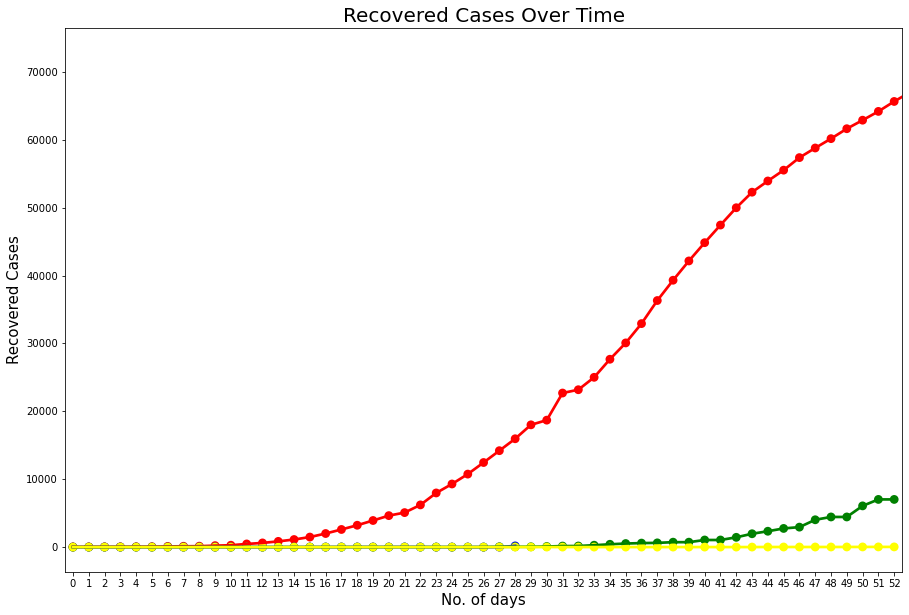

In [41]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Recovered,color = 'Red')
sns.pointplot(US.index,US.Recovered,color = 'Blue')
sns.pointplot(Italy.index,Italy.Recovered,color = 'Green')
sns.pointplot(India.index,India.Recovered,color = 'Yellow')

plt.title('Recovered Cases Over Time',fontsize = 20)
plt.ylabel('Recovered Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()


- We see that the Recovery cases has been highest by China due the Lockdown imposed.
- The Recovery for Italy has been very less, which shows that the rules were not followed properly by the public and proper steps were not taken by the Government to put a hold at the pandemic